# Working with Spark Functions

Start by creating a Spark session and loading in data, using the following code:

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DataFrameFunctions").getOrCreate()

In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://s3.amazonaws.com/dataviz-curriculum/day_1/wine.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("wine.csv"), sep=",", header=True)

# Show DataFrame
df.show()

Now we'll use this data to identify the difference between transformations and actions.


Transformations are the instructions for the computation. With the data loaded in, let's perform some transformations. What do you think will happen after we run the following code?

In [ ]:
# Order a DataFrame by ascending values
df.orderBy(df["points"].desc())

If you guessed that nothing would happen yet, you would be correct. Here we applied the transformation to order the DataFrame by points in descending order. All we're doing is telling Spark that we want this DataFrame to be organized in this particular way, and Spark says, "Okay, got it—just let me know when you want me to do this."

Actions direct Spark to perform the computation instructions and return a result. What do you think will happen when you add .show(5) to the DataFrame?

In [ ]:
df.orderBy(df['points'].desc()).show(5)

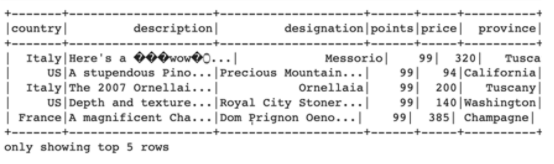

## Recap
Let's break down these concepts one more time:

orderBy() and desc() are transformations telling Spark how to organize the data. Spark will read these transformations as instructions, but it won't act on them just yet.
show() is an action that gives the go-ahead for Spark to run all of those transformations and to produce a result.

## More Functions
Let's take a look at a few more functions that we can use with Spark. As you continue to enter the code in your notebooks, keep in mind which methods you think are transformations and which ones are actions.

Spark can import additional functions, such as averages. Type and run the following code:

In [ ]:
# Import Functions
from pyspark.sql.functions import avg
df.select(avg('points')).show'()

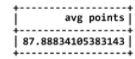

The avg() function is the transformation, and show() is the action.

Spark can filter on columns by supplying the name of the column and operator and what to compare it against. Refer to the following code and results:

In [ ]:
# Filter
df.filter9'price<20').show (5)

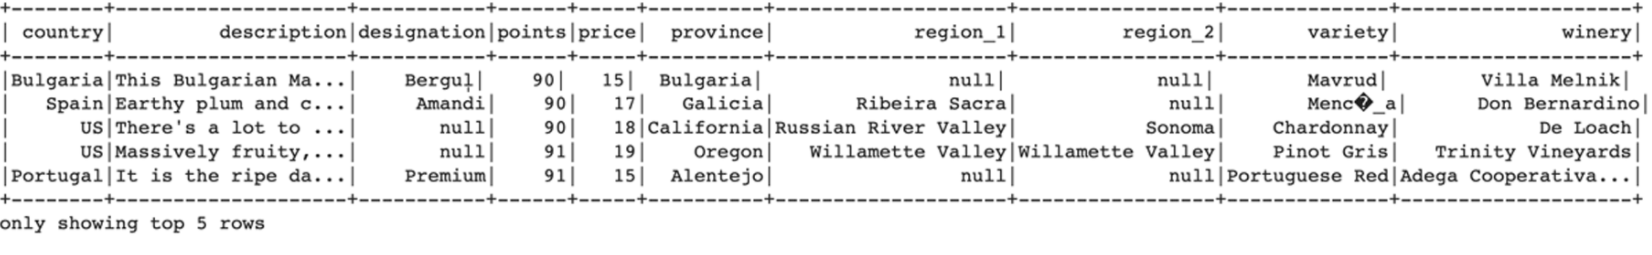

Filter is the transformation and show is the action.

We can also filter and select certain columns:

In [ ]:
# Filter by price on certain columns
df.filter('price<20').select(['points','country', 'winery', 'price']).show(5)

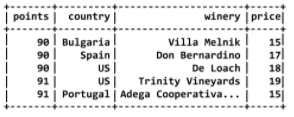

Both filter and select are separate transformations, and show is again the action.

Spark has multiple ways to perform transformations. For instance, how we were filtering our DataFrame was actually using SQL context with price<20.

However, we can also perform the same transformations using Python:



In [ ]:
# Filter
df.filter("price<20").show(5)
# Filter by price on certain columns
df.filter("price<20").select(['points','country', 'winery','price']).show(5)

# Filter on exact state
df.filter(df["country"] == "US").show()

You might notice that there are more transformations than actions. Usually, we want to do several things with a dataset, but we'll only want to see those results in a few ways.